In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import scipy
import importlib
import rsc 
import SatCallbacks
import Clone_Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

import pkgutil

"""
(trainX, trainy), (testX, testy) = rsc.get_cifar10()

# load dataset
#(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
# show the figure
plt.show()
"""

(train_images, train_labels), (test_images, test_labels) = rsc.get_cifar10(one_hot=False)

Shape of cifar10 y_train: (50000, 1)


In [2]:
#   CIFAR-10 ON EXAMPLE MODEL
######################################

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=1, batch_size=7, 
                    validation_data=(test_images, test_labels))



7143/7143 [==============================] - 293s 41ms/step - loss: 1.5045 - accuracy: 0.4494 - val_loss: 1.3170 - val_accuracy: 0.5319


In [32]:
importlib.reload(Clone_Model)
importlib.reload(SatCallbacks)
#model.summary()


clone = Clone_Model.satify_model(model)

"""
clone.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              run_eagerly = tf.executing_eagerly())
"""
#model.summary()
#clone.summary()

#for l in clone.layers:
#    if l

sat_cb = SatCallbacks.sat_results()

new_cb = SatCallbacks.sat_logger()

history = clone.fit(train_images, train_labels,
                    epochs=1,
                    batch_size=7,
                    steps_per_epoch=3,
                    validation_data=(test_images, test_labels), 
                    validation_steps=1, 
                    callbacks=[sat_cb, new_cb])



Model output_shape: (None, 10)
input_shape: [None, 64]
layer_width: (64,)
SatLayer input shape (None, 64) not matching current_activation property shape (0, 64)
batch_size initialized. current shape is: Tensor("dense_25/Shape:0", shape=(1,), dtype=int32)
input_shape: [None, 10]
layer_width: (10,)
SatLayer input shape (None, 10) not matching current_activation property shape (0, 10)
batch_size initialized. current shape is: Tensor("dense_1_22/Shape:0", shape=(1,), dtype=int32)
Layer Conv2D
Layer MaxPooling2D
Layer Conv2D
Layer MaxPooling2D
Layer Conv2D
Layer Flatten
Layer mydense
Layer mydense
cross-replica-ctxt: False
tf.dist.strat:  <tensorflow.python.distribute.distribute_lib._DefaultDistributionStrategy object at 0x7f4aa4ab2690>
SatLayer input shape (7, 64) not matching current_activation property shape (0, 64)
SatLayer input shape (7, 10) not matching current_activation property shape (0, 10)
current_activation: []
current_activation: []
1/3 [=========>....................] - ETA: 

InvalidArgumentError: Incompatible shapes: [0,64] vs. [7,64] [Op:Equal]

(32, 32, 3)
(32, 32, 3)


ValueError: in user code:

    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/leo/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [32, 224, 3]


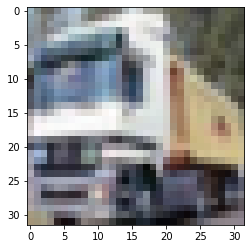

In [26]:
#     CIFAR-10 ON PRE-TRAINED VGG-16
#############################################


model = VGG16(weights='imagenet', include_top=False)
img = train_images[1]
print(np.shape(img))
img = tf.image.resize(img, [224,224])
print(np.shape(img))

#plt.imshow(img)



#img_input = tf.keras.Input(tensor=img, shape=[None,224,224,3])
output = model.predict(imgs)


#img = cifar
